In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.cluster import KMeans,  AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score, v_measure_score
from sklearn.metrics import confusion_matrix 
from scipy.optimize import linear_sum_assignment
from sklearn.decomposition import TruncatedSVD, NMF
from matplotlib import pyplot as plt
import numpy as np
import random
import pandas as pd
import umap.umap_ as umap #0.4.6
import joblib #0.17.0
np.random.seed(0)
random.seed(0)

In [23]:
!pip install hdbscan

     |████████████████████████████████| 6.4 MB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311885 sha256=52ab72e2cafdd2cb7449a23ab2aa7966605a10c36266685515b8f7b5464d846b
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [24]:
import hdbscan

In [9]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
def plot_mat(mat, xticklabels = None, yticklabels = None, pic_fname = None, size=(-
1,-1), if_show_values = True,
             colorbar = True, grid = 'k', xlabel = None, ylabel = None, title = 
None, vmin=None, vmax=None):
    if size == (-1, -1):
        size = (mat.shape[1] / 3, mat.shape[0] / 3)
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1,1,1)
    # im = ax.imshow(mat, cmap=plt.cm.Blues)
    im = ax.pcolor(mat, cmap=plt.cm.Blues, linestyle='-', linewidth=0.5, 
edgecolor=grid, vmin=vmin, vmax=vmax)
    
    if colorbar:
        plt.colorbar(im,fraction=0.046, pad=0.06)
    # tick_marks = np.arange(len(classes))
    # Ticks
    lda_num_topics = mat.shape[0]
    nmf_num_topics = mat.shape[1]
    yticks = np.arange(lda_num_topics)
    xticks = np.arange(nmf_num_topics)
    ax.set_xticks(xticks + 0.5)
    ax.set_yticks(yticks + 0.5)
    if xticklabels is None:
        xticklabels = [str(i) for i in xticks]
    if yticklabels is None:
        yticklabels = [str(i) for i in yticks]
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    # Minor ticks
    # ax.set_xticks(xticks, minor=True);
    # ax.set_yticks(yticks, minor=True);
    # ax.set_xticklabels([], minor=True)
    # ax.set_yticklabels([], minor=True)
    # ax.grid(which='minor', color='k', linestyle='-', linewidth=0.5)
    # tick labels on all four sides
    ax.tick_params(labelright = True, labeltop = False)
    if ylabel:
        plt.ylabel(ylabel, fontsize=15)
    if xlabel:
        plt.xlabel(xlabel, fontsize=15)
    if title:
        plt.title(title, fontsize=15)
    # im = ax.imshow(mat, interpolation='nearest', cmap=plt.cm.Blues)
    ax.invert_yaxis()
    # thresh = mat.max() / 2
    def show_values(pc, fmt="%.0f", **kw):
        pc.update_scalarmappable()
        ax = pc.axes
        for p, color, value in itertools.zip_longest(pc.get_paths(), 
pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.all(color[:3] > 0.5):
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
            ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw,
fontsize=10)
    if if_show_values:
        show_values(im)
    # for i, j in itertools.product(range(mat.shape[0]), range(mat.shape[1])):
    #     ax.text(j, i, "{:.2f}".format(mat[i, j]), fontsize = 4,
    #              horizontalalignment="center",
    #              color="white" if mat[i, j] > thresh else "black")
    plt.tight_layout()
    if pic_fname:
        plt.savefig(pic_fname, dpi=300, transparent=True)
    plt.show()
    plt.close()

In [2]:
dataset = fetch_20newsgroups(subset = 'all',shuffle = True, random_state = 0,remove=('headers','footers'))
vectorizer = CountVectorizer(stop_words='english',min_df=3)
tfidf_transformer = TfidfTransformer()
data_feat_vec = vectorizer.fit_transform(dataset.data)
data_feat = tfidf_transformer.fit_transform(data_feat_vec)

In [5]:
svd_hs = []
svd_cs = []
svd_vs = []
svd_ari = []
svd_ms = []

km = KMeans(n_clusters=20, init='k-means++', max_iter=1000, n_init=30, random_state=0)
r = [1,2,3,5,10,20,50,100,300]

for i in range(len(r)):
    print('Testing SVD for r = ',r[i])
    svd = TruncatedSVD(n_components=r[i], random_state=0)
    svd_km = svd.fit_transform(data_feat)
    kmean_svd = km.fit(svd_km)
    svd_hs.append(homogeneity_score(dataset.target, kmean_svd.labels_))
    svd_cs.append(completeness_score(dataset.target, kmean_svd.labels_))
    svd_vs.append(v_measure_score(dataset.target, kmean_svd.labels_))
    svd_ari.append(adjusted_rand_score(dataset.target, kmean_svd.labels_))
    svd_ms.append(adjusted_mutual_info_score(dataset.target, kmean_svd.labels_)) 
print('Done testing')

Testing SVD for r =  1
Testing SVD for r =  2
Testing SVD for r =  3
Testing SVD for r =  5
Testing SVD for r =  10
Testing SVD for r =  20
Testing SVD for r =  50
Testing SVD for r =  100
Testing SVD for r =  300
Done testing


In [6]:
print('R: ',r)
print('Homogeneity (SVD, various r): ',svd_hs)
print('Completeness (SVD, various r): ',svd_cs) 
print('V-measure (SVD, various r): ',svd_vs) 
print('Adjusted Rand-Index (SVD, various r): ',svd_ari) 
print('Adjusted Mutual Information Score (SVD, various r): ',svd_ms)


R:  [1, 2, 3, 5, 10, 20, 50, 100, 300]
Homogeneity (SVD, various r):  [0.024233513537244858, 0.21234220367375342, 0.2471117274448064, 0.3201627171469848, 0.32494049403973524, 0.333035330305657, 0.28388555847121416, 0.3307545340133054, 0.2976251438838621]
Completeness (SVD, various r):  [0.02673996633386354, 0.22459003819124507, 0.26536211866091736, 0.34828903054171256, 0.3542622607632521, 0.3756147353734766, 0.3556956839271337, 0.3999846479644101, 0.3720767741278082]
V-measure (SVD, various r):  [0.025425116659709947, 0.21829445878904244, 0.2559119535133701, 0.3336341411516646, 0.33896845446522134, 0.35304583607960316, 0.315759316201346, 0.36209016599298477, 0.3307125168893496]
Adjusted Rand-Index (SVD, various r):  [0.005297741266282442, 0.06575955994455099, 0.08309902112064539, 0.1259875510824014, 0.12285669602358998, 0.12021994803797648, 0.07936131715268141, 0.1113858195844356, 0.08796142781878807]
Adjusted Mutual Information Score (SVD, various r):  [0.022085896272956772, 0.2156940

In [7]:
avg_metrics = [y/5 for y in [sum(x) for x in zip(svd_hs, svd_cs, svd_vs, svd_ari, svd_ms)]]
best_r_SVD = r[avg_metrics.index(max(avg_metrics))]
print('Best value of r for SVD (according to avg. metric): ', best_r_SVD, ', avg. value of 5 metrics: ',max(avg_metrics))

Best value of r for SVD (according to avg. metric):  100 , avg. value of 5 metrics:  0.3128069316335743


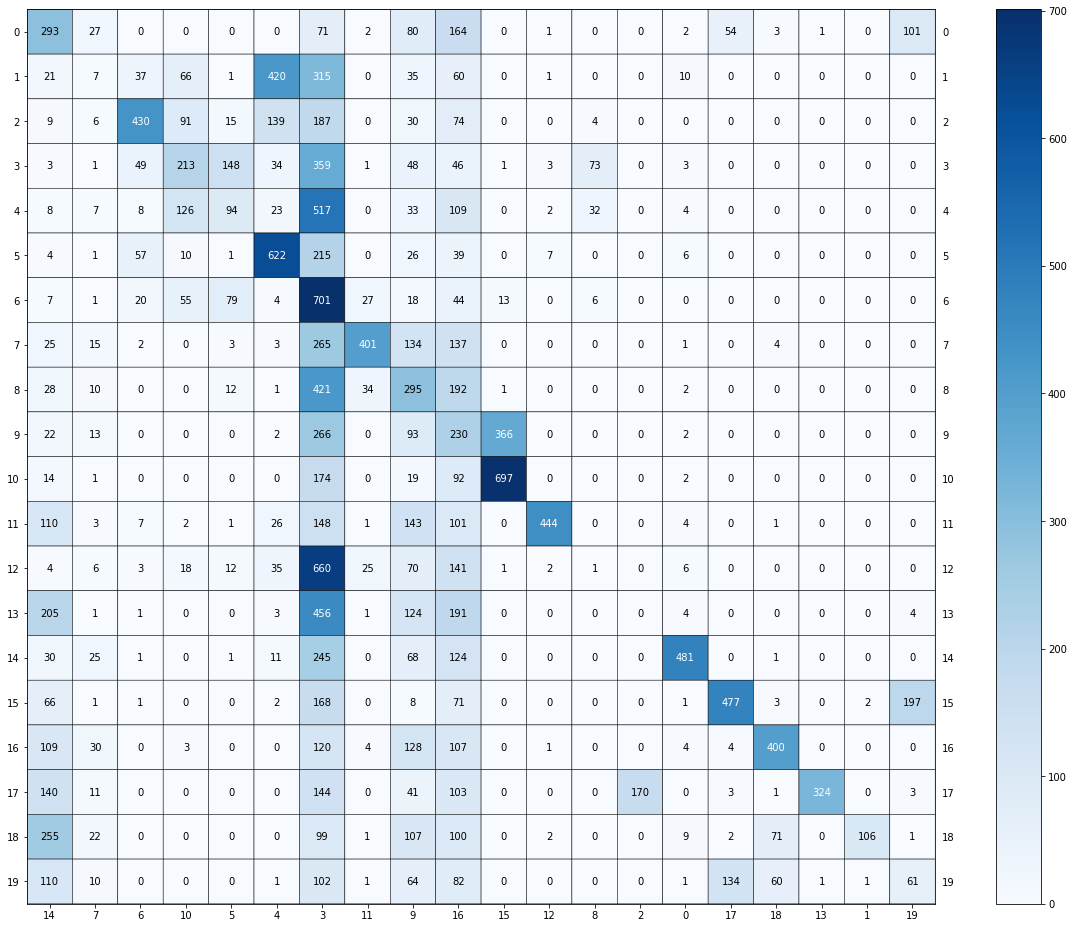

Homogeneity (SVD, best r): 0.331
Completeness (SVD, best r): 0.400
V-measure (SVD, best r): 0.362
Adjusted Rand-Index (SVD, best r): 0.111
Adjusted Mutual Information Score (SVD, best r): 0.360


In [10]:
svd = TruncatedSVD(n_components=best_r_SVD, random_state=0)
svd_km = svd.fit_transform(data_feat)
kmean_svd = km.fit(svd_km)
cm = confusion_matrix(dataset.target, km.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,13),pic_fname = 'Q9.png')
print("Homogeneity (SVD, best r): %0.3f" % homogeneity_score(dataset.target, km.labels_))
print("Completeness (SVD, best r): %0.3f" % completeness_score(dataset.target, km.labels_))
print("V-measure (SVD, best r): %0.3f" % v_measure_score(dataset.target, km.labels_))
print("Adjusted Rand-Index (SVD, best r): %.3f"% adjusted_rand_score(dataset.target, km.labels_))
print("Adjusted Mutual Information Score (SVD, best r): %.3f"% adjusted_mutual_info_score(dataset.target, km.labels_))

In [11]:
nmf_hs = []
nmf_cs = []
nmf_vs = []
nmf_ari = []
nmf_ms = []

for i in range(len(r)-1): 
    print('Testing NMF for r = ',r[i])
    nmf = NMF(n_components=r[i], init='random', random_state=0, max_iter=400)
    nmf_km = nmf.fit_transform(data_feat)
    kmean_nmf = km.fit(nmf_km)
    nmf_hs.append(homogeneity_score(dataset.target, kmean_nmf.labels_))
    nmf_cs.append(completeness_score(dataset.target, kmean_nmf.labels_))
    nmf_vs.append(v_measure_score(dataset.target, kmean_nmf.labels_))
    nmf_ari.append(adjusted_rand_score(dataset.target, kmean_nmf.labels_))
    nmf_ms.append(adjusted_mutual_info_score(dataset.target, kmean_nmf.labels_))
print('Done testing')

Testing NMF for r =  1
Testing NMF for r =  2
Testing NMF for r =  3
Testing NMF for r =  5
Testing NMF for r =  10
Testing NMF for r =  20
Testing NMF for r =  50
Testing NMF for r =  100
Done testing


In [12]:
print('R: ',r[:-1])
print('Homogeneity (NMF, various r): ',nmf_hs)
print('Completeness (NMF, various r): ',nmf_cs) 
print('V-measure (NMF, various r): ',nmf_vs) 
print('Adjusted Rand-Index (NMF, various r): ',nmf_ari) 
print('Adjusted Mutual Information Score (NMF, various r): ',nmf_ms)

R:  [1, 2, 3, 5, 10, 20, 50, 100]
Homogeneity (NMF, various r):  [0.024239137233528926, 0.19219640113142314, 0.21759697070078016, 0.2676257983910962, 0.2879484499953904, 0.2744487797074483, 0.23308715900099994, 0.14850893908931295]
Completeness (NMF, various r):  [0.02674619037376771, 0.20502118735704652, 0.2561872805484155, 0.28941948898737657, 0.3273568778366389, 0.3526034280542059, 0.33967885032303596, 0.19102666978534658]
V-measure (NMF, various r):  [0.025431025330945028, 0.19840176018217479, 0.2353205115299862, 0.27809631843295274, 0.3063906691674962, 0.3086555771666248, 0.27646465364787426, 0.1671057015881883]
Adjusted Rand-Index (NMF, various r):  [0.0052999337984488476, 0.05819280806933572, 0.06716437022801673, 0.08738192611077013, 0.09948113152861335, 0.07171551160239839, 0.05321033198953036, 0.03306317949656457]
Adjusted Mutual Information Score (NMF, various r):  [0.022091824061119637, 0.19571494709338666, 0.23261094027960355, 0.2756678950186103, 0.3039893914010459, 0.30612

In [13]:
avg_metrics = [y/5 for y in [sum(x) for x in zip(nmf_hs, nmf_cs, nmf_vs, nmf_ari, nmf_ms)]]
best_r_NMF = r[avg_metrics.index(max(avg_metrics))]
print('Best value of r for NMF (according to avg. metric): ', best_r_NMF, ', avg. value of 5 metrics: ',max(avg_metrics))

Best value of r for NMF (according to avg. metric):  10 , avg. value of 5 metrics:  0.2650333039858369


In [14]:
nmf_normal = NMF(n_components=best_r_NMF,init='random', random_state=1, max_iter=1000)
nmf_km_normal = nmf_normal.fit_transform(data_feat)
kmean_nmf_normal= km.fit(nmf_km_normal)

nmf_KL = NMF(n_components=best_r_NMF,init='random', random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000,alpha=.1,
          l1_ratio=.5)
nmf_km_KL = nmf_KL.fit_transform(data_feat)
kmean_nmf_KL = km.fit(nmf_km_KL)

print("Homogeneity (NMF Normal, best r): %0.3f" % homogeneity_score(dataset.target, kmean_nmf_normal.labels_))
print("Completeness (NMF Normal, best r): %0.3f" % completeness_score(dataset.target, kmean_nmf_normal.labels_))
print("V-measure (NMF Normal, best r): %0.3f" % v_measure_score(dataset.target, kmean_nmf_normal.labels_))
print("Adjusted Rand-Index (NMF Normal, best r): %.3f"% adjusted_rand_score(dataset.target, kmean_nmf_normal.labels_))
print("Adjusted Mutual Information Score (NMF Normal, best r): %.3f"% adjusted_mutual_info_score(dataset.target, kmean_nmf_normal.labels_))

print("Homogeneity (NMF KL, best r): %0.3f" % homogeneity_score(dataset.target, kmean_nmf_KL.labels_))
print("Completeness (NMF KL, best r): %0.3f" % completeness_score(dataset.target, kmean_nmf_KL.labels_))
print("V-measure (NMF KL, best r): %0.3f" % v_measure_score(dataset.target, kmean_nmf_KL.labels_))
print("Adjusted Rand-Index (NMF KL, best r): %.3f"% adjusted_rand_score(dataset.target, kmean_nmf_KL.labels_))
print("Adjusted Mutual Information Score (NMF KL, best r): %.3f"% adjusted_mutual_info_score(dataset.target, kmean_nmf_KL.labels_))

Homogeneity (NMF Normal, best r): 0.433
Completeness (NMF Normal, best r): 0.446
V-measure (NMF Normal, best r): 0.439
Adjusted Rand-Index (NMF Normal, best r): 0.226
Adjusted Mutual Information Score (NMF Normal, best r): 0.438
Homogeneity (NMF KL, best r): 0.433
Completeness (NMF KL, best r): 0.446
V-measure (NMF KL, best r): 0.439
Adjusted Rand-Index (NMF KL, best r): 0.226
Adjusted Mutual Information Score (NMF KL, best r): 0.438


In [15]:
euc_hs = []
euc_cs = []
euc_vs = []
euc_ari = []
euc_ms = []
cos_hs = []
cos_cs = []
cos_vs = []
cos_ari = []
cos_ms = []

for i in range(len(r)-1):
    print('Testing UMAP (euc) for r = ',r[i])
    Umap_euc = umap.UMAP(n_components=r[i], metric='euclidean').fit_transform(data_feat)
    kmean_euc = km.fit(Umap_euc)
    euc_hs.append(homogeneity_score(dataset.target, kmean_euc.labels_))
    euc_cs.append(completeness_score(dataset.target, kmean_euc.labels_))
    euc_vs.append(v_measure_score(dataset.target, kmean_euc.labels_))
    euc_ari.append(adjusted_rand_score(dataset.target, kmean_euc.labels_))
    euc_ms.append(adjusted_mutual_info_score(dataset.target, kmean_euc.labels_)) 
    
    print('Testing UMAP (cos) for r = ',r[i])
    Umap_cos = umap.UMAP(n_components=r[i], metric='cosine').fit_transform(data_feat)
    kmean_cos = km.fit(Umap_cos)
    cos_hs.append(homogeneity_score(dataset.target, kmean_cos.labels_))
    cos_cs.append(completeness_score(dataset.target, kmean_cos.labels_))
    cos_vs.append(v_measure_score(dataset.target, kmean_cos.labels_))
    cos_ari.append(adjusted_rand_score(dataset.target, kmean_cos.labels_))
    cos_ms.append(adjusted_mutual_info_score(dataset.target, kmean_cos.labels_)) 
print('Done testing')

Testing UMAP (euc) for r =  1
Testing UMAP (cos) for r =  1
Testing UMAP (euc) for r =  2
Testing UMAP (cos) for r =  2
Testing UMAP (euc) for r =  3
Testing UMAP (cos) for r =  3
Testing UMAP (euc) for r =  5
Testing UMAP (cos) for r =  5
Testing UMAP (euc) for r =  10
Testing UMAP (cos) for r =  10
Testing UMAP (euc) for r =  20
Testing UMAP (cos) for r =  20
Testing UMAP (euc) for r =  50
Testing UMAP (cos) for r =  50
Testing UMAP (euc) for r =  100
Testing UMAP (cos) for r =  100
Done testing


In [16]:
print('R: ',r[:-1])
print('Homogeneity (UMAP (euclidean), various r): ',euc_hs)
print('Completeness (UMAP (euclidean), various r): ',euc_cs) 
print('V-measure (UMAP (euclidean), various r): ',euc_vs) 
print('Adjusted Rand-Index (UMAP (euclidean), various r): ',euc_ari) 
print('Adjusted Mutual Information Score (UMAP (euclidean), various r): ',euc_ms)
print('Homogeneity (UMAP (cosine), various r): ',cos_hs)
print('Completeness (UMAP (cosine), various r): ',cos_cs) 
print('V-measure (UMAP (cosine), various r): ',cos_vs) 
print('Adjusted Rand-Index (UMAP (cosine), various r): ',cos_ari) 
print('Adjusted Mutual Information Score (UMAP (cosine), various r): ',cos_ms)

R:  [1, 2, 3, 5, 10, 20, 50, 100]
Homogeneity (UMAP (euclidean), various r):  [0.008878729495333732, 0.009524537446715267, 0.008378525749387357, 0.008013882896519515, 0.008389522927431415, 0.0075885592205359245, 0.008363797574685777, 0.007656999480239876]
Completeness (UMAP (euclidean), various r):  [0.009324890632516392, 0.009704272289063731, 0.008591979091161049, 0.008203054460623124, 0.008730175991169705, 0.007890653064576807, 0.008691432158557886, 0.007950207479238913]
V-measure (UMAP (euclidean), various r):  [0.009096342476738174, 0.009613564862345788, 0.008483910022698455, 0.008107365329650458, 0.008556460249292077, 0.007736658295827267, 0.008524467901666565, 0.007800849273592829]
Adjusted Rand-Index (UMAP (euclidean), various r):  [0.0011540530083138634, 0.001865160869070743, 0.0010853627663784666, 0.0012117368316024854, 0.00122118266214049, 0.0015825132475710752, 0.0011983566946205467, 0.001036341898340817]
Adjusted Mutual Information Score (UMAP (euclidean), various r):  [0.0

In [17]:
avg_metrics = [y/5 for y in [sum(x) for x in zip(euc_hs, euc_cs, euc_vs, euc_ari, euc_ms)]]
best_r_euc = r[avg_metrics.index(max(avg_metrics))]
print('Best value of r for Euclidean UMAP (according to avg. metric): ', best_r_euc, ', avg. value of 5 metrics: ',max(avg_metrics))
print('Metrics: ')
print('Homogeneity (UMAP (euclidean), best r): ',euc_hs[avg_metrics.index(max(avg_metrics))])
print('Completeness (UMAP (euclidean), best r): ',euc_cs[avg_metrics.index(max(avg_metrics))]) 
print('V-measure (UMAP (euclidean), best r): ',euc_vs[avg_metrics.index(max(avg_metrics))]) 
print('Adjusted Rand-Index (UMAP (euclidean), best r): ',euc_ari[avg_metrics.index(max(avg_metrics))]) 
print('Adjusted Mutual Information Score (UMAP (euclidean), best r): ',euc_ms[avg_metrics.index(max(avg_metrics))])
avg_metrics = [y/5 for y in [sum(x) for x in zip(cos_hs, cos_cs, cos_vs, cos_ari, cos_ms)]]
best_r_cos = r[avg_metrics.index(max(avg_metrics))]
print('Best value of r for Cosine UMAP (according to avg. metric): ', best_r_cos, ', avg. value of 5 metrics: ',max(avg_metrics))
print('Metrics: ')
print('Homogeneity (UMAP (cosine), best r): ',cos_hs[avg_metrics.index(max(avg_metrics))])
print('Completeness (UMAP (cosine), best r): ',cos_cs[avg_metrics.index(max(avg_metrics))]) 
print('V-measure (UMAP (cosine), best r): ',cos_vs[avg_metrics.index(max(avg_metrics))]) 
print('Adjusted Rand-Index (UMAP (cosine), best r): ',cos_ari[avg_metrics.index(max(avg_metrics))]) 
print('Adjusted Mutual Information Score (UMAP (cosine), best r): ',cos_ms[avg_metrics.index(max(avg_metrics))])

Best value of r for Euclidean UMAP (according to avg. metric):  2 , avg. value of 5 metrics:  0.007418363515082302
Metrics: 
Homogeneity (UMAP (euclidean), best r):  0.009524537446715267
Completeness (UMAP (euclidean), best r):  0.009704272289063731
V-measure (UMAP (euclidean), best r):  0.009613564862345788
Adjusted Rand-Index (UMAP (euclidean), best r):  0.001865160869070743
Adjusted Mutual Information Score (UMAP (euclidean), best r):  0.0063842821082159724
Best value of r for Cosine UMAP (according to avg. metric):  20 , avg. value of 5 metrics:  0.5649468523394863
Metrics: 
Homogeneity (UMAP (cosine), best r):  0.5794601012917987
Completeness (UMAP (cosine), best r):  0.6014533980318418
V-measure (UMAP (cosine), best r):  0.5902519484203353
Adjusted Rand-Index (UMAP (cosine), best r):  0.4646765141350141
Adjusted Mutual Information Score (UMAP (cosine), best r):  0.5888922998184412


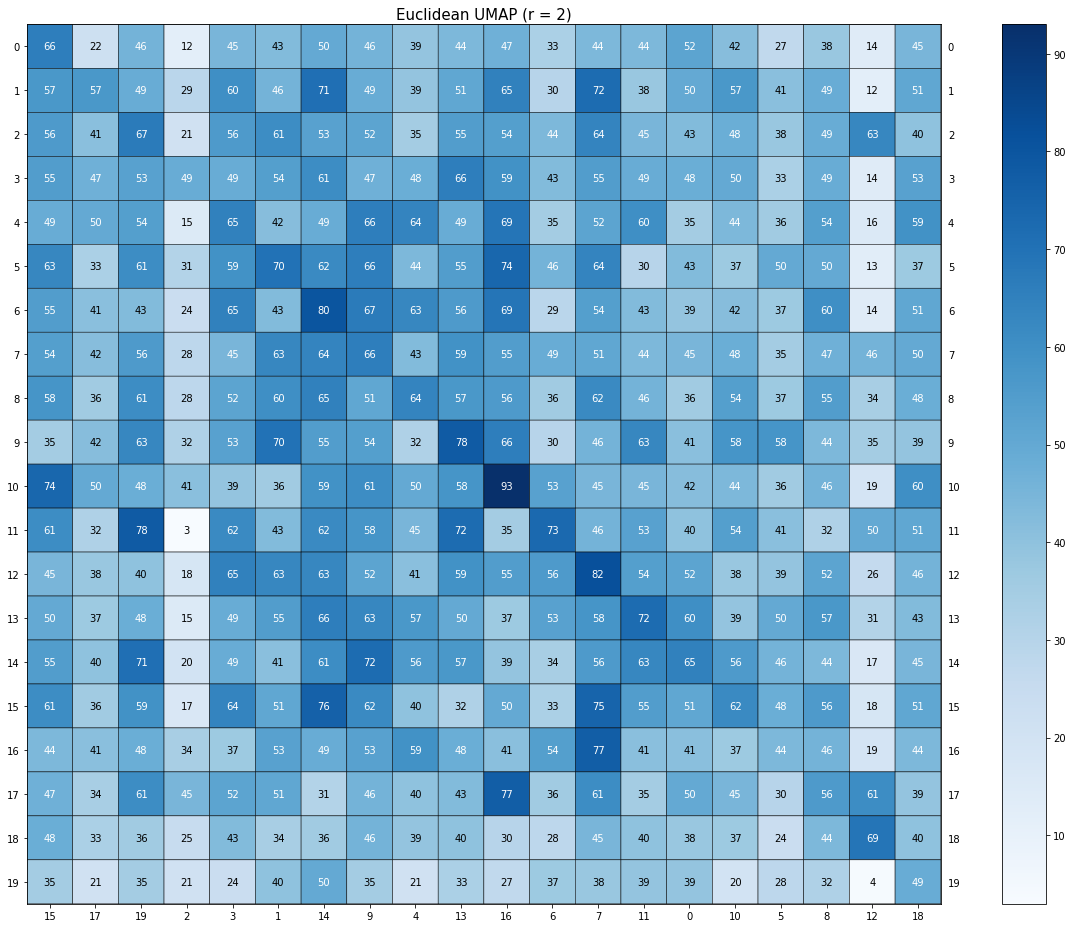

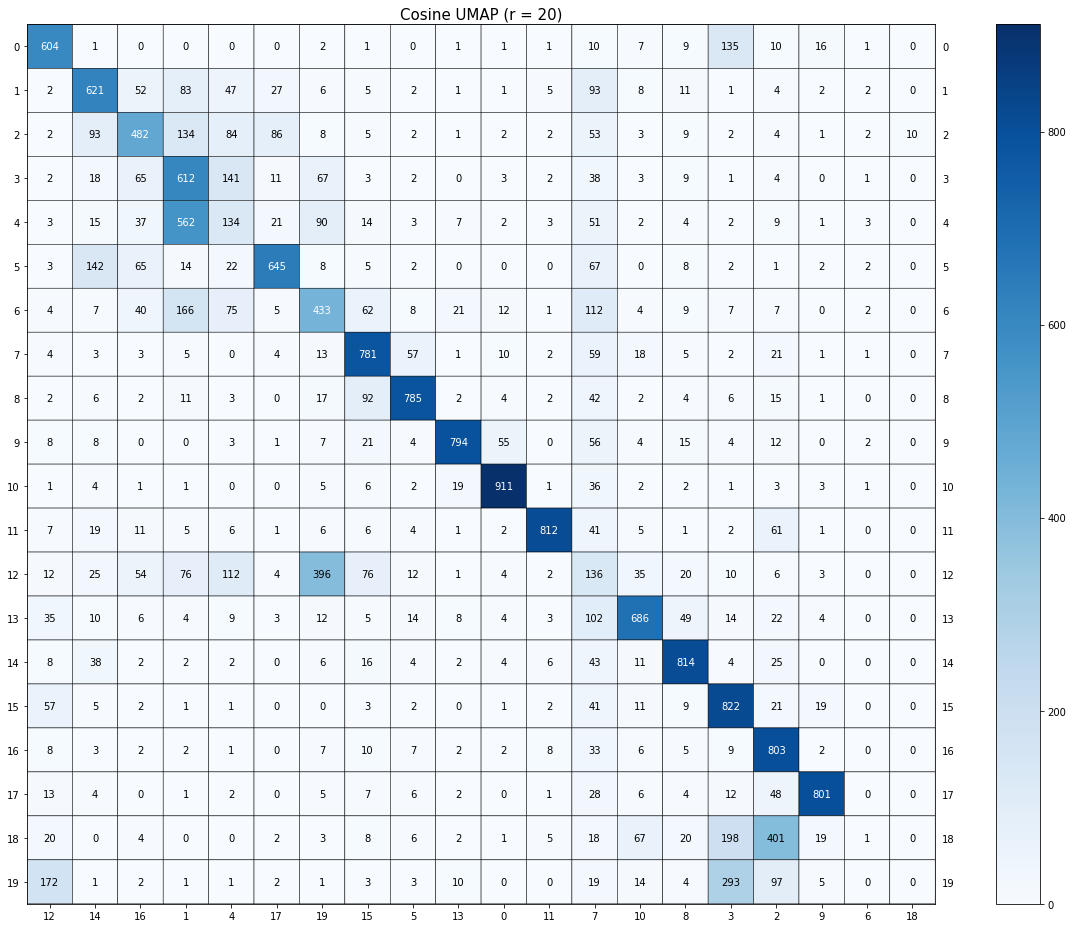

In [18]:
Umap_euc = umap.UMAP(n_components=best_r_euc, metric='euclidean').fit_transform(data_feat)
kmean_euc = km.fit(Umap_euc)
cm = confusion_matrix(dataset.target, kmean_euc.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, title = 'Euclidean UMAP (r = 2)', size=(15,13),pic_fname = 'Q111.png')

Umap_cos = umap.UMAP(n_components=best_r_cos, metric='cosine').fit_transform(data_feat)
kmean_cos = km.fit(Umap_cos)
cm = confusion_matrix(dataset.target, kmean_cos.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, title = 'Cosine UMAP (r = 20)', size=(15,13),pic_fname = 'Q112.png')

In [19]:
ac_w = AgglomerativeClustering(n_clusters=20, linkage='ward').fit(Umap_cos)
ac_s = AgglomerativeClustering(n_clusters=20, linkage='single').fit(Umap_cos)
print("Agglomerative Clustering, Ward - Homogeneity: %0.3f" % homogeneity_score(dataset.target, ac_w.labels_))
print("Agglomerative Clustering, Ward - Completeness: %0.3f" % completeness_score(dataset.target, ac_w.labels_))
print("Agglomerative Clustering, Ward - V-measure: %0.3f" % v_measure_score(dataset.target, ac_w.labels_))
print("Agglomerative Clustering, Ward - Adjusted Rand-Index: %.3f"% adjusted_rand_score(dataset.target, ac_w.labels_))
print("Agglomerative Clustering, Ward - Adjusted Mutual Information Score: %.3f"% adjusted_mutual_info_score(dataset.target, ac_w.labels_))
print()
print("Agglomerative Clustering, Single - Homogeneity: %0.3f" % homogeneity_score(dataset.target, ac_s.labels_))
print("Agglomerative Clustering, Single - Completeness: %0.3f" % completeness_score(dataset.target, ac_s.labels_))
print("Agglomerative Clustering, Single - V-measure: %0.3f" % v_measure_score(dataset.target, ac_s.labels_))
print("Agglomerative Clustering, Single - Adjusted Rand-Index: %.3f"% adjusted_rand_score(dataset.target, ac_s.labels_))
print("Agglomerative Clustering, Single - Adjusted Mutual Information Score: %.3f"% adjusted_mutual_info_score(dataset.target, ac_s.labels_))

Agglomerative Clustering, Ward - Homogeneity: 0.553
Agglomerative Clustering, Ward - Completeness: 0.582
Agglomerative Clustering, Ward - V-measure: 0.567
Agglomerative Clustering, Ward - Adjusted Rand-Index: 0.412
Agglomerative Clustering, Ward - Adjusted Mutual Information Score: 0.566

Agglomerative Clustering, Single - Homogeneity: 0.007
Agglomerative Clustering, Single - Completeness: 0.275
Agglomerative Clustering, Single - V-measure: 0.013
Agglomerative Clustering, Single - Adjusted Rand-Index: 0.000
Agglomerative Clustering, Single - Adjusted Mutual Information Score: 0.008


In [20]:
eps_rec = []
min_samples_rec = []
db_hs = []
db_cs = []
db_vs = []
db_ari = []
db_ms = []

eps = [0.01,0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,3.0,5.0,10.0,30.0,50.0]
min_samples = [5,15,30,60,100,200,500,1000,3000]

for i in range(len(eps)):
    for j in range(len(min_samples)):
        print('Testing for e and min_sample = ',eps[i],'and',min_samples[j])
        dbs = DBSCAN(eps=eps[i],min_samples=min_samples[j],n_jobs=-1).fit_predict(Umap_cos)
        db_hs.append(homogeneity_score(dataset.target, dbs))
        db_cs.append(completeness_score(dataset.target, dbs))
        db_vs.append(v_measure_score(dataset.target, dbs))
        db_ari.append(adjusted_rand_score(dataset.target, dbs))
        db_ms.append(adjusted_mutual_info_score(dataset.target, dbs)) 
        eps_rec.append(eps[i])
        min_samples_rec.append(min_samples[j])
print('Done testing')

Testing for e and min_sample =  0.01 and 5
Testing for e and min_sample =  0.01 and 15
Testing for e and min_sample =  0.01 and 30
Testing for e and min_sample =  0.01 and 60
Testing for e and min_sample =  0.01 and 100
Testing for e and min_sample =  0.01 and 200
Testing for e and min_sample =  0.01 and 500
Testing for e and min_sample =  0.01 and 1000
Testing for e and min_sample =  0.01 and 3000
Testing for e and min_sample =  0.05 and 5
Testing for e and min_sample =  0.05 and 15
Testing for e and min_sample =  0.05 and 30
Testing for e and min_sample =  0.05 and 60
Testing for e and min_sample =  0.05 and 100
Testing for e and min_sample =  0.05 and 200
Testing for e and min_sample =  0.05 and 500
Testing for e and min_sample =  0.05 and 1000
Testing for e and min_sample =  0.05 and 3000
Testing for e and min_sample =  0.1 and 5
Testing for e and min_sample =  0.1 and 15
Testing for e and min_sample =  0.1 and 30
Testing for e and min_sample =  0.1 and 60
Testing for e and min_sam

In [21]:
avg_metrics = [y/5 for y in [sum(x) for x in zip(db_hs, db_cs, db_vs, db_ari, db_ms)]]
best_eps_db = eps_rec[avg_metrics.index(max(avg_metrics))]
best_minSample_db = min_samples_rec[avg_metrics.index(max(avg_metrics))]
print('Best value of epsilon and minimum number of samples hyperparameters for DBSCAN: ', best_eps_db,'and',best_minSample_db, ' respectively, avg. value of 5 metrics: ',max(avg_metrics))
print('Metrics: ')
print('Homogeneity (DBSCAN, best hyperparameters): ',db_hs[avg_metrics.index(max(avg_metrics))])
print('Completeness (DBSCAN, best hyperparameters): ',db_cs[avg_metrics.index(max(avg_metrics))]) 
print('V-measure (DBSCAN, best hyperparameters): ',db_vs[avg_metrics.index(max(avg_metrics))]) 
print('Adjusted Rand-Index (DBSCAN, best hyperparameters): ',db_ari[avg_metrics.index(max(avg_metrics))]) 
print('Adjusted Mutual Information Score (DBSCAN, best hyperparameters): ',db_ms[avg_metrics.index(max(avg_metrics))])

Best value of epsilon and minimum number of samples hyperparameters for DBSCAN:  0.9 and 500  respectively, avg. value of 5 metrics:  0.4898606555148618
Metrics: 
Homogeneity (DBSCAN, best hyperparameters):  0.4505706176253225
Completeness (DBSCAN, best hyperparameters):  0.6696252561297367
V-measure (DBSCAN, best hyperparameters):  0.5386798368047954
Adjusted Rand-Index (DBSCAN, best hyperparameters):  0.2525887602515154
Adjusted Mutual Information Score (DBSCAN, best hyperparameters):  0.5378388067629389


In [25]:
eps_rec = []
min_samples_rec = []
hdb_hs = []
hdb_cs = []
hdb_vs = []
hdb_ari = []
hdb_ms = []

for i in range(len(eps)):
    for j in range(len(min_samples)):
        print('Testing for e and min_sample = ',eps[i],'and',min_samples[j])
        hdbs = hdbscan.HDBSCAN(min_cluster_size=100,cluster_selection_epsilon=eps[i],min_samples=min_samples[j],core_dist_n_jobs=-1).fit_predict(Umap_cos)
        hdb_hs.append(homogeneity_score(dataset.target, hdbs))
        hdb_cs.append(completeness_score(dataset.target, hdbs))
        hdb_vs.append(v_measure_score(dataset.target, hdbs))
        hdb_ari.append(adjusted_rand_score(dataset.target, hdbs))
        hdb_ms.append(adjusted_mutual_info_score(dataset.target, hdbs)) 
        eps_rec.append(eps[i])
        min_samples_rec.append(min_samples[j])
print('Done testing')

Testing for e and min_sample =  0.01 and 5
Testing for e and min_sample =  0.01 and 15
Testing for e and min_sample =  0.01 and 30
Testing for e and min_sample =  0.01 and 60
Testing for e and min_sample =  0.01 and 100
Testing for e and min_sample =  0.01 and 200
Testing for e and min_sample =  0.01 and 500
Testing for e and min_sample =  0.01 and 1000
Testing for e and min_sample =  0.01 and 3000
Testing for e and min_sample =  0.05 and 5
Testing for e and min_sample =  0.05 and 15
Testing for e and min_sample =  0.05 and 30
Testing for e and min_sample =  0.05 and 60
Testing for e and min_sample =  0.05 and 100
Testing for e and min_sample =  0.05 and 200
Testing for e and min_sample =  0.05 and 500
Testing for e and min_sample =  0.05 and 1000
Testing for e and min_sample =  0.05 and 3000
Testing for e and min_sample =  0.1 and 5
Testing for e and min_sample =  0.1 and 15
Testing for e and min_sample =  0.1 and 30
Testing for e and min_sample =  0.1 and 60
Testing for e and min_sam

In [26]:
avg_metrics = [y/5 for y in [sum(x) for x in zip(hdb_hs, hdb_cs, hdb_vs, hdb_ari, hdb_ms)]]
best_eps_hdb = eps_rec[avg_metrics.index(max(avg_metrics))]
best_minSample_hdb = min_samples_rec[avg_metrics.index(max(avg_metrics))]
print('Best value of epsilon and minimum number of samples hyperparameters for HDBSCAN: ', best_eps_hdb,'and',best_minSample_hdb, ' respectively, avg. value of 5 metrics: ',max(avg_metrics))
print('Metrics: ')
print('Homogeneity (HDBSCAN, best hyperparameters): ',hdb_hs[avg_metrics.index(max(avg_metrics))])
print('Completeness (HDBSCAN, best hyperparameters): ',hdb_cs[avg_metrics.index(max(avg_metrics))]) 
print('V-measure (HDBSCAN, best hyperparameters): ',hdb_vs[avg_metrics.index(max(avg_metrics))]) 
print('Adjusted Rand-Index (HDBSCAN, best hyperparameters): ',hdb_ari[avg_metrics.index(max(avg_metrics))]) 
print('Adjusted Mutual Information Score (HDBSCAN, best hyperparameters): ',hdb_ms[avg_metrics.index(max(avg_metrics))])

Best value of epsilon and minimum number of samples hyperparameters for HDBSCAN:  0.3 and 5  respectively, avg. value of 5 metrics:  0.48081540142482526
Metrics: 
Homogeneity (HDBSCAN, best hyperparameters):  0.46070057414336
Completeness (HDBSCAN, best hyperparameters):  0.5997040711586736
V-measure (HDBSCAN, best hyperparameters):  0.5210916627401566
Adjusted Rand-Index (HDBSCAN, best hyperparameters):  0.30250027340533325
Adjusted Mutual Information Score (HDBSCAN, best hyperparameters):  0.5200804256766023


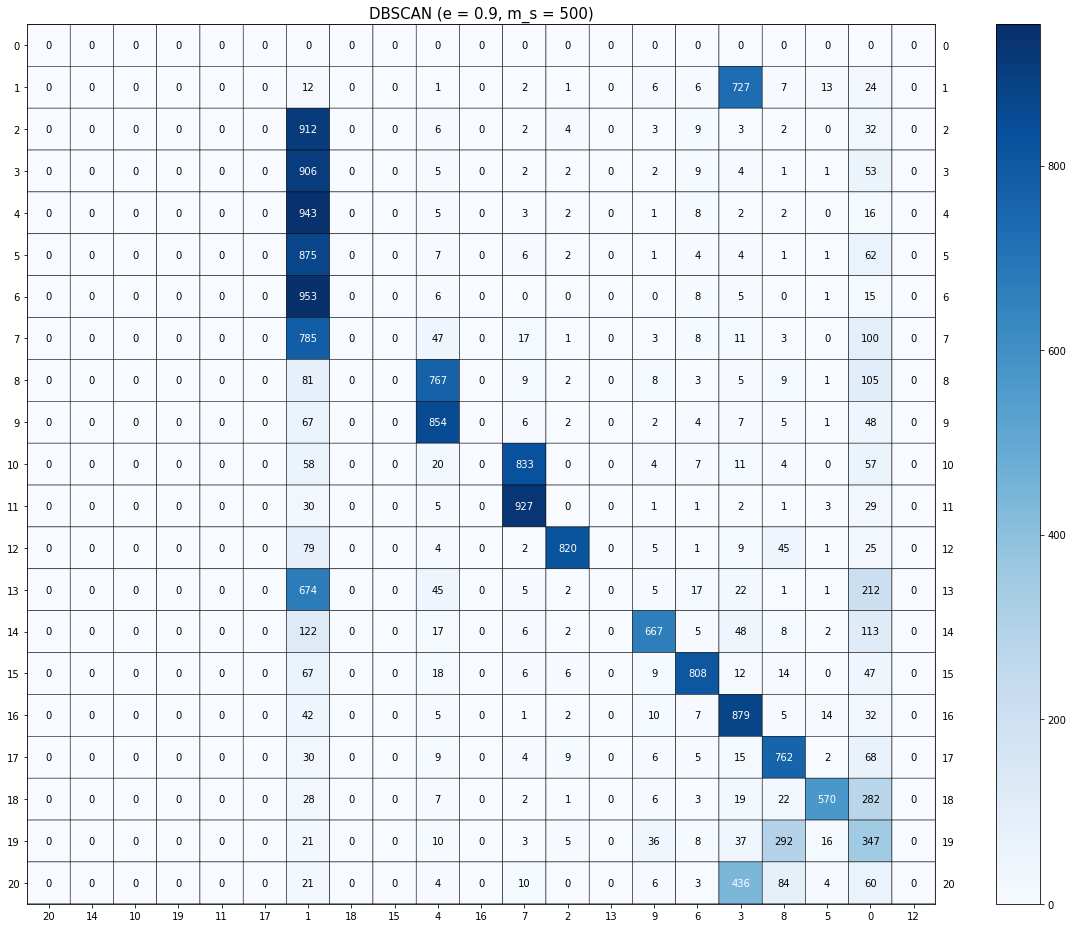

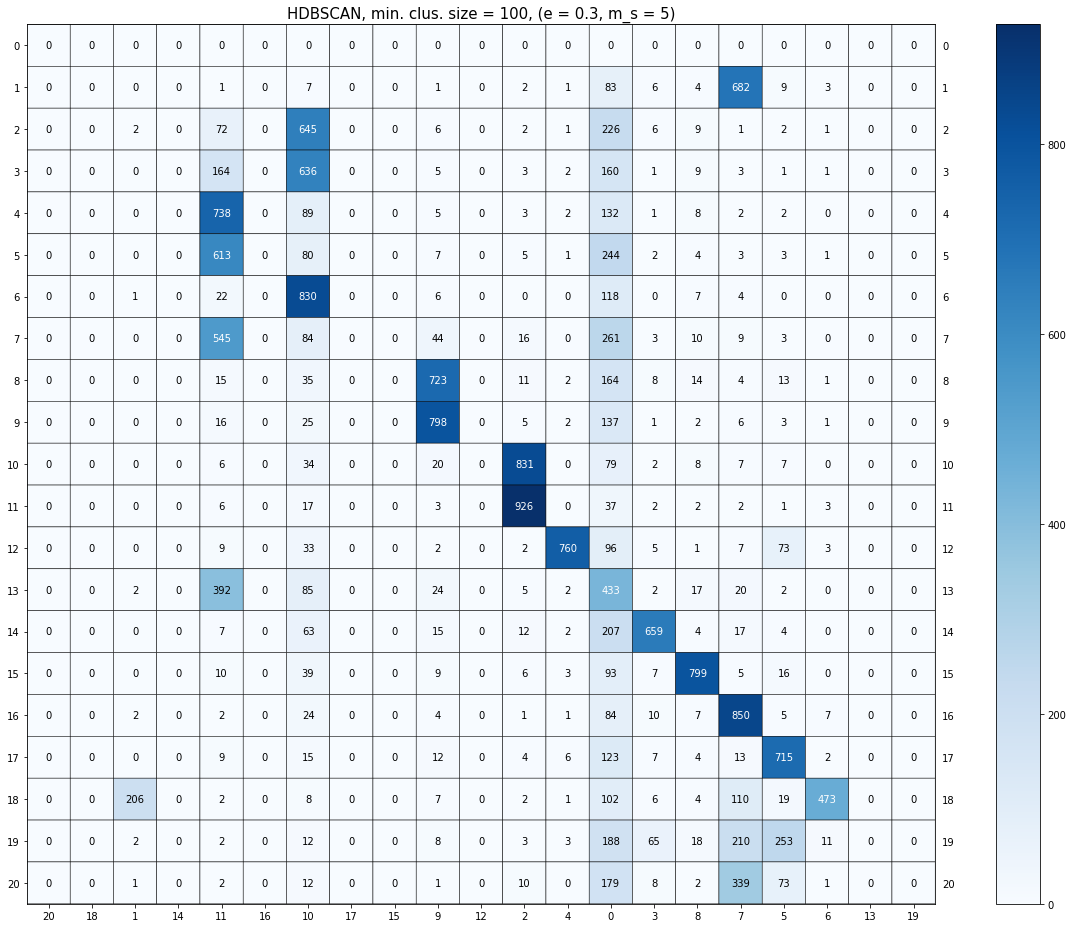

In [27]:
dbs = DBSCAN(eps=best_eps_db,min_samples=best_minSample_db ,n_jobs=-1).fit_predict(Umap_cos)
cm = confusion_matrix(dataset.target, dbs)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, title = 'DBSCAN (e = 0.9, m_s = 500)', size=(15,13),pic_fname = 'Q151.png')

hdbs = hdbscan.HDBSCAN(min_cluster_size=100,cluster_selection_epsilon=best_eps_hdb,min_samples=best_minSample_hdb,core_dist_n_jobs=-1).fit_predict(Umap_cos)
cm = confusion_matrix(dataset.target, hdbs)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, title = 'HDBSCAN, min. clus. size = 100, (e = 0.3, m_s = 5)', size=(15,13),pic_fname = 'Q152.png')

In [33]:
hdbs

array([-1,  9,  6, ...,  6,  9,  9])

In [35]:
dbs

array([0, 0, 2, ..., 2, 0, 0])

In [36]:
print("PLS WAIT")

PLS WAIT
